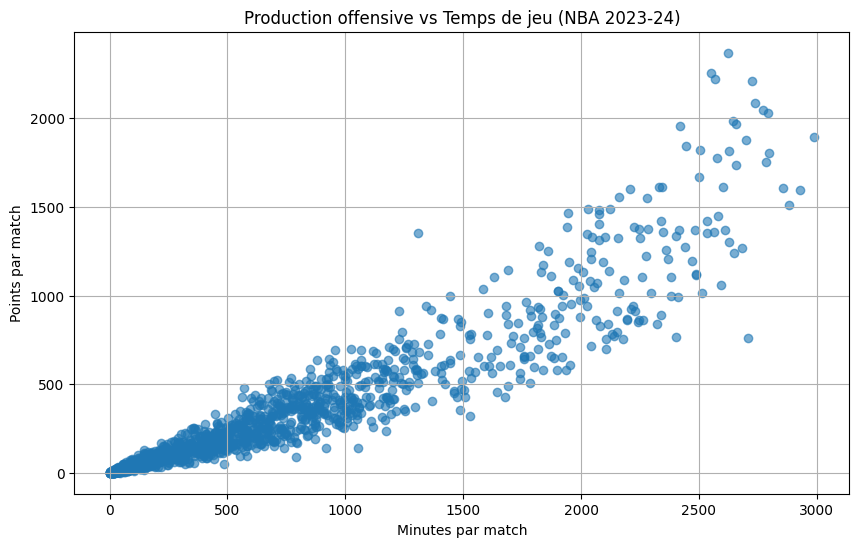

In [1]:
from nba_api.stats.endpoints import LeagueDashPlayerStats
import pandas as pd
import matplotlib.pyplot as plt

# Récupère les stats de tous les joueurs pour la saison 2023-24
player_stats = LeagueDashPlayerStats(season="2023-24")
df_players = player_stats.get_data_frames()[0]

# Aperçu des colonnes utiles
df_players[["PLAYER_NAME", "TEAM_ABBREVIATION", "GP", "MIN", "PTS", "FG_PCT"]].head(10)

plt.figure(figsize=(10, 6))
plt.scatter(df_players["MIN"], df_players["PTS"], alpha=0.6)
plt.xlabel("Minutes par match")
plt.ylabel("Points par match")
plt.title("Production offensive vs Temps de jeu (NBA 2023-24)")
plt.grid(True)
plt.show()

In [2]:
# Récupération des stats par joueur sur la saison 2023-24
player_stats = LeagueDashPlayerStats(season="2023-24")
df_players = player_stats.get_data_frames()[0]

# Suppression des joueurs avec 0 minute (évite division par zéro)
df_players = df_players[df_players["MIN"] > 0]

# Calcul du ratio points / minute
df_players["PTS_PER_MIN"] = df_players["PTS"] / df_players["MIN"]

# Filtrer : joueurs ayant joué peu de minutes mais ayant participé à au moins 10 matchs
underrated = df_players[(df_players["MIN"] < 600) & (df_players["GP"] > 10)]

# Trier par efficacité offensive
top_ratio = underrated.sort_values("PTS_PER_MIN", ascending=False)

# Affichage des 10 meilleurs profils
top_ratio[["PLAYER_NAME", "TEAM_ABBREVIATION", "GP", "MIN", "PTS", "PTS_PER_MIN", "FG_PCT"]].head(10)


,PLAYER_NAME,TEAM_ABBREVIATION,GP,MIN,PTS,PTS_PER_MIN,FG_PCT
881,Kenneth Lofton Jr.,MHU,19,571.475000,477,0.834682,0.560
991,Luka Garza,MIN,25,121.840000,99,0.812541,0.480
1330,Shabazz Muhammad,STO,12,85.750000,69,0.804665,0.481
773,Jordan Walker,TEX,20,559.860000,429,0.766263,0.470
925,Kobe Bufkin,CPS,14,447.316667,331,0.739968,0.444
1272,Ricky Council IV,DEL,11,352.420000,254,0.720731,0.467
400,Duane Washington Jr.,WES,11,343.266667,247,0.719557,0.440
157,Brice Sensabaugh,SLC,13,357.445000,254,0.710599,0.472
49,Alex Reese,RCR,32,599.968333,421,0.701704,0.442
1328,Seth Lundy,CPS,12,404.388333,277,0.684985,0.508
